In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index = pd.read_csv('economic_index.csv')

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
# Drop unnecessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
# Check for null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

C:\Users\Deepak Yadav\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


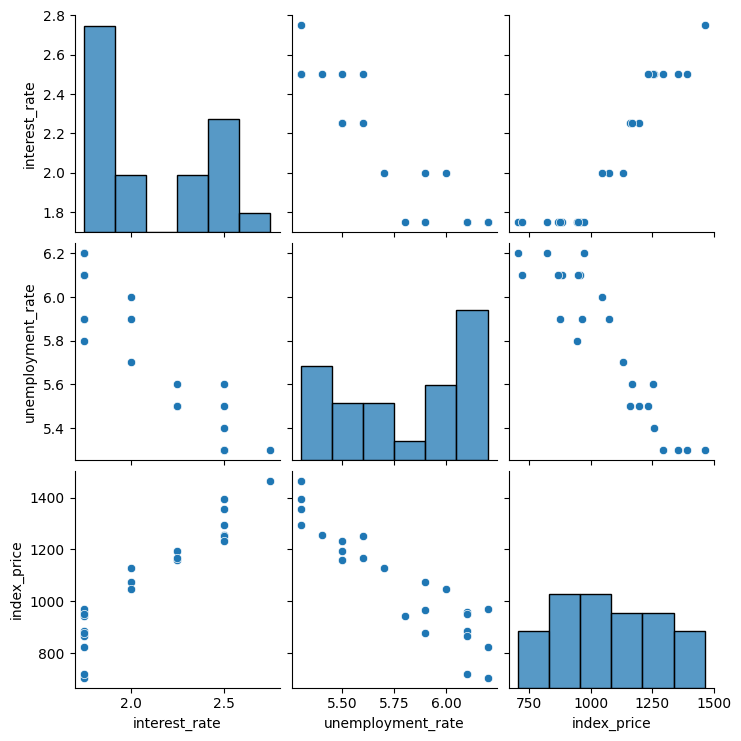

In [7]:
## Visualization
import seaborn as sns
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0.5, 1.0, 'Scatter Plot (Interest Rate vs unemployment rate)')

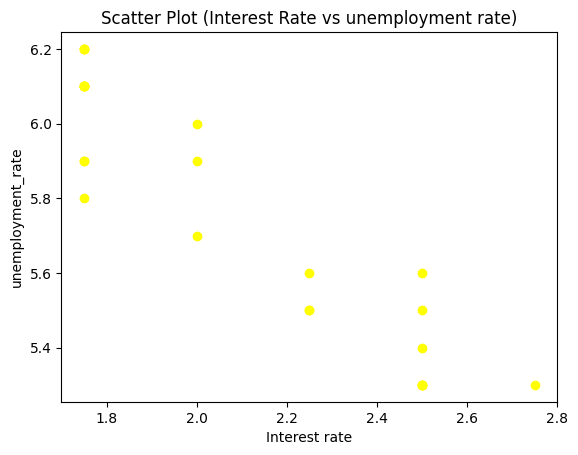

In [9]:
## Visualize the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'], color = 'Yellow')
plt.xlabel("Interest rate")
plt.ylabel("unemployment_rate")
plt.title("Scatter Plot (Interest Rate vs unemployment rate)")

In [10]:
## Independent and dependent features
X = df_index[['interest_rate','unemployment_rate']] 
#X = df.iloc[:,:-1] (above setps also can be written as)
y=df_index[['index_price']]
#y=[:,-1] (above setps also can be written as)

In [11]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [12]:
y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [15]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
import seaborn as sns

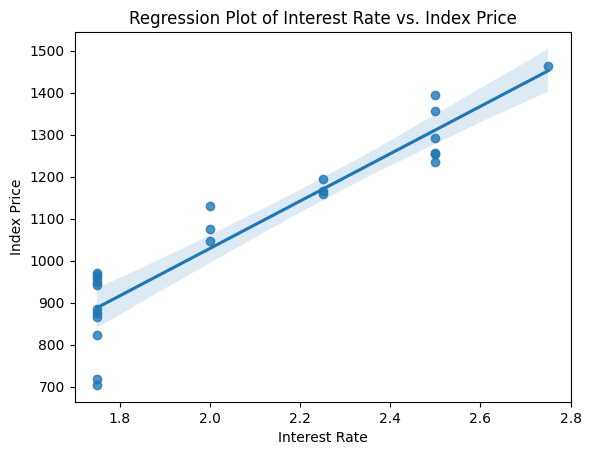

In [22]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.title('Regression Plot of Interest Rate vs. Index Price')
plt.show()

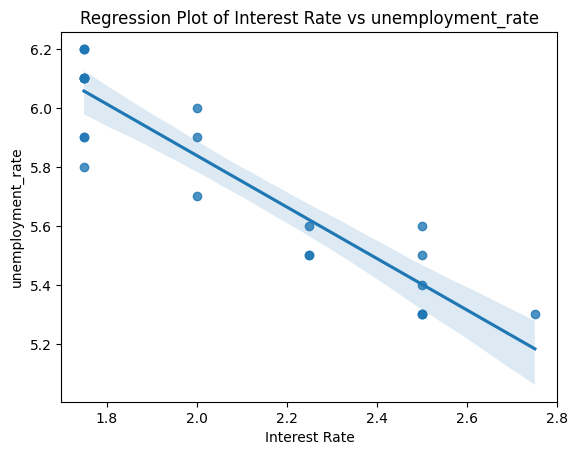

In [23]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)
plt.xlabel('Interest Rate')
plt.ylabel('unemployment_rate')
plt.title('Regression Plot of Interest Rate vs unemployment_rate')
plt.show()

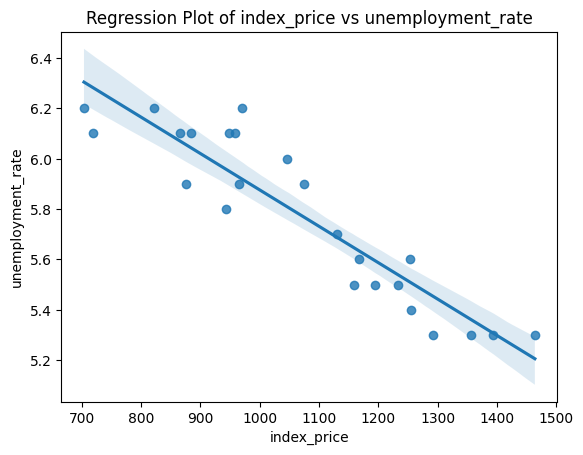

In [24]:
sns.regplot(x='index_price', y='unemployment_rate', data=df_index)
plt.xlabel('index_price')
plt.ylabel('unemployment_rate')
plt.title('Regression Plot of index_price vs unemployment_rate')
plt.show()

In [29]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [32]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [33]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [35]:
# Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,
                                   scoring='neg_mean_squared_error',
                                   cv=3)

In [37]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [36]:
np.mean(validation_score)

-5914.828180162386

In [38]:
## prediction
y_pred = regression.predict(X_test)

In [39]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


## R square 
Formula

**R^2 = 1 - SSR/SST**


1. R^2	=	coefficient of determination
2. SSR	=	sum of squares of residuals
3. SST	=	total sum of squares

In [41]:
from sklearn.metrics import r2_score

In [42]:
score=r2_score(y_test,y_pred)
print(score)

0.7591371539010257


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

1. R2: The R2 of the model
2. n: The number of observations
3. k: The number of predictor variables

In [46]:
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.5985619231683761


## Assumptions

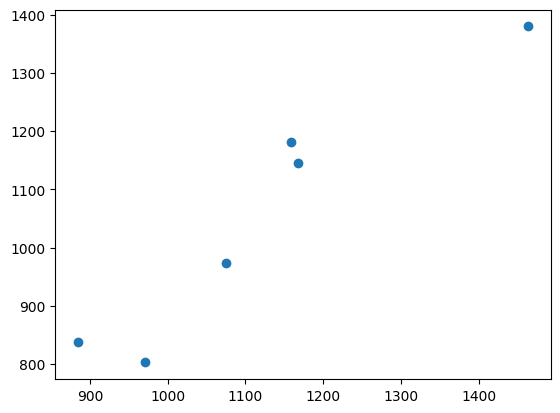

In [47]:
plt.scatter(y_test,y_pred)

In [48]:
residuals = y_test-y_pred
print(residuals)

    index_price
8    -21.746681
16   168.257203
0     84.165430
18    45.474004
11   101.146860
9     22.036518


C:\Users\Deepak Yadav\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


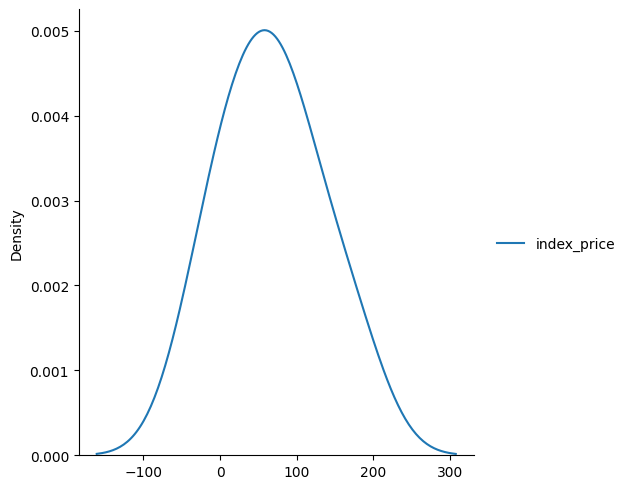

In [49]:
## Plot this residuals
sns.displot(residuals,kind='kde') #kde = kernel density estimator

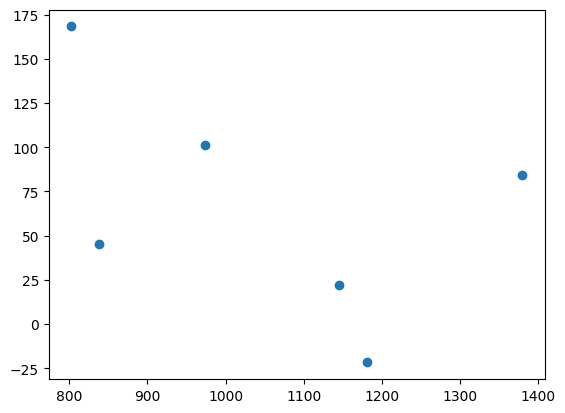

In [50]:
## Scatter Plot w.r.t predictions and residuals
plt.scatter(y_pred,residuals)

### OLS Linear Regression

In [51]:
import statsmodels.api as sm

In [52]:
model=sm.OLS(y_train,X_train).fit()

In [53]:
prediction=model.predict(X_test)
print(prediction)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [54]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 03 Sep 2023   Prob (F-statistic):                       0.754
Time:                        22:28:12   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Deepak Yadav\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [55]:
print(regression.coef_)

[[  88.27275507 -116.25716066]]
